<a href="https://colab.research.google.com/github/Topofajar/TugasAkhir/blob/main/Script_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dasar PSO

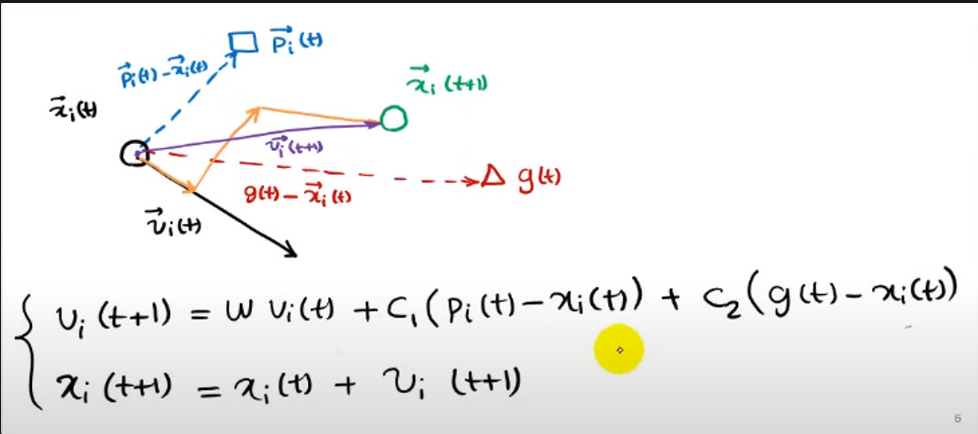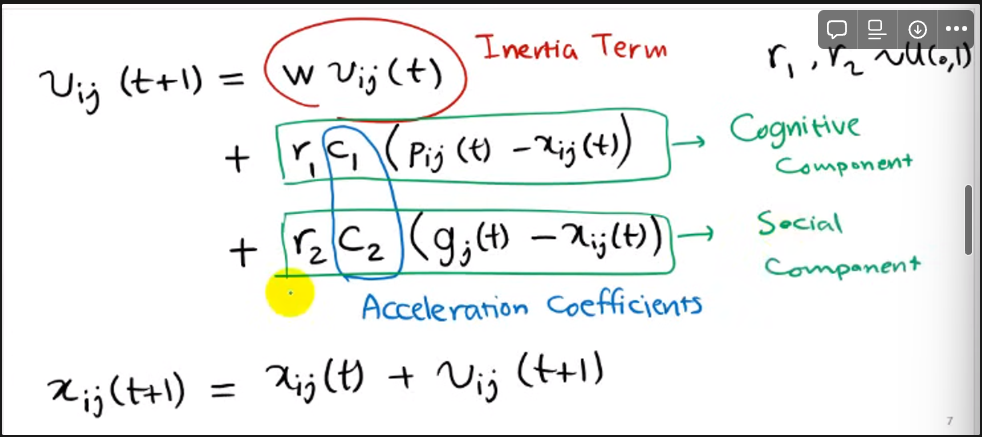

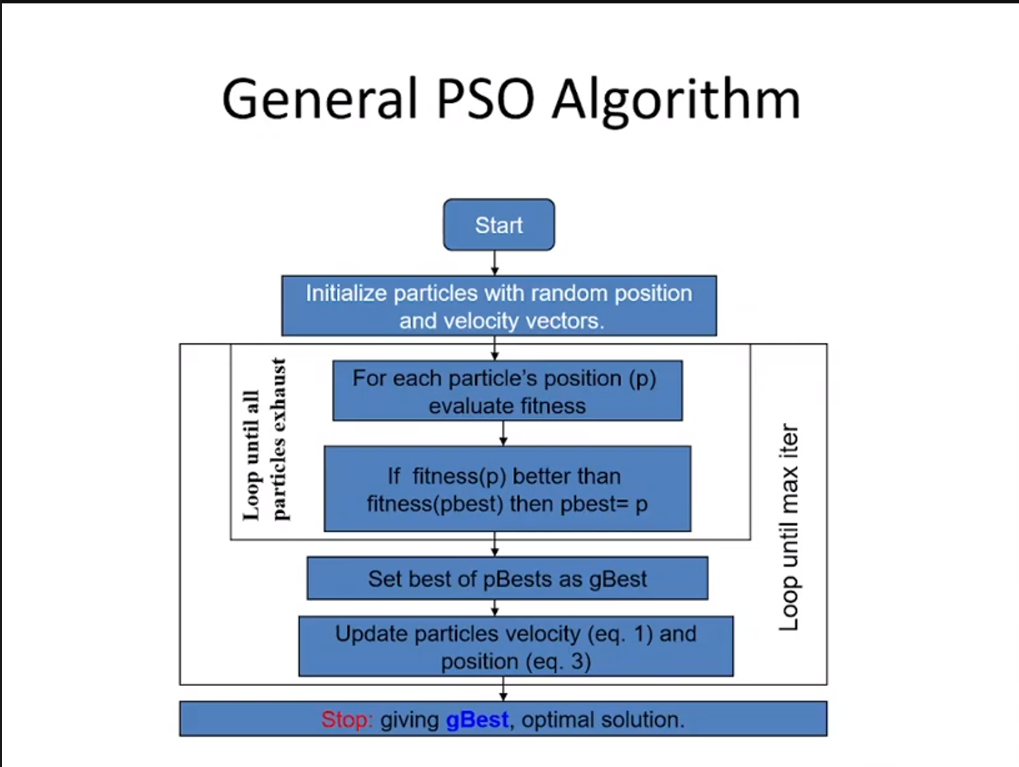

# Dasar Program

## Class


*   Dalam paradigma pemrograman berorientasi objek (OOP), kelas adalah struktur dasar yang digunakan untuk menciptakan objek.
*   Kelas mendefinisikan **atribut** (variabel) dan **metode** (fungsi) yang akan dimiliki oleh setiap objek yang dibuat berdasarkan kelas tersebut. Atribut merepresentasikan data yang terkait dengan objek, sedangkan metode adalah fungsi-fungsi yang dapat beroperasi pada objek tersebut.
*   Sebagai contoh, jika kita ingin membuat program untuk mengelola data mahasiswa, kita dapat membuat kelas bernama Mahasiswa yang memiliki atribut seperti nama, usia, dan jurusan, serta metode untuk mengubah atau memperoleh informasi tentang mahasiswa tersebut.



In [1]:
class Calculator:
    def __init__(self):
        self.result = 0  # Menyimpan hasil perhitungan

    def add(self, x, y):
        self.result = x + y

    def subtract(self, x, y):
        self.result = x - y

    def multiply(self, x, y):
        self.result = x * y

    def divide(self, x, y):
        if y != 0:
            self.result = x / y
        else:
            print("Error: Division by zero")

# Contoh penggunaan
if __name__ == "__main__":
    calculator = Calculator()  # Membuat objek Calculator

    calculator.add(5, 3)  # Menambahkan 5 dan 3
    print("Hasil penjumlahan:", calculator.result)

    calculator.subtract(10, 4)  # Mengurangkan 4 dari 10
    print("Hasil pengurangan:", calculator.result)

    calculator.multiply(2, 6)  # Mengalikan 2 dengan 6
    print("Hasil perkalian:", calculator.result)

    calculator.divide(8, 2)  # Membagi 8 dengan 2
    print("Hasil pembagian:", calculator.result)

    calculator.divide(5, 0)  # Mencoba pembagian dengan nol


Hasil penjumlahan: 8
Hasil pengurangan: 6
Hasil perkalian: 12
Hasil pembagian: 4.0
Error: Division by zero


* `def __init__(self):` akan dipanggil ketika objek dari kelas `Calculator ` dibuat, atribut `result` diinisialisasi dengan nilai 0.
* `__init__` dalam sebuah kelas Python adalah metode khusus yang disebut konstruktor, berguna  jika Anda perlu melakukan inisialisasi awal pada objek, seperti mengatur nilai awal untuk atribut-atribut objek.
* Ketika mendefinisikan metode di dalam sebuah kelas harus selalu menyertakan parameter `self` sebagai parameter pertama dalam definisi metode.
* Kegunaan utama dari `self` adalah untuk membedakan antara atribut dan metode dari objek kelas tersebut dengan variabel lokal atau global yang mungkin memiliki nama yang sama di dalam lingkup yang lebih luas.
* `if __name__ == "__main__":`, memastikan bahwa potongan kode di dalam blok tersebut hanya dijalankan jika skrip dieksekusi langsung sebagai program utama dan tidak dijalankan saat skrip diimpor sebagai modul ke dalam skrip lain.

In [2]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def introduce(self):
        print("My name is", self.name, "and I am", self.age, "years old.")

# Membuat objek dari kelas Person
person1 = Person("John", 30)

# Memanggil metode introduce() dari objek person1
person1.introduce()


My name is John and I am 30 years old.


# PSO Sumber Youtube

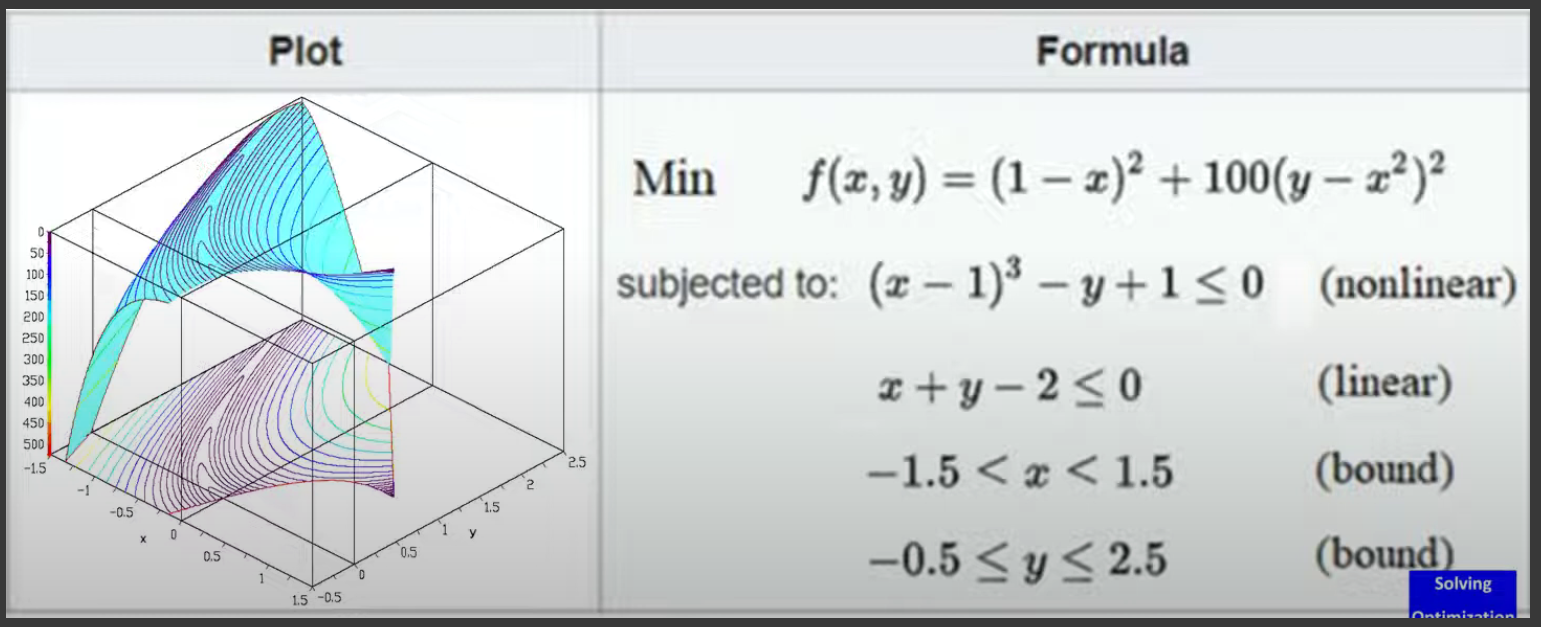

In [3]:
import random
import time
import matplotlib.pyplot as plt

In [4]:
# Objective function, constrain, boundary
def objective_function(O):
    x = O[0]
    y = O[1]
    nonlinear_constraint = (x - 1) ** 3 - y + 1
    linear_constraint = x + y - 2
    if nonlinear_constraint > 0:
        penalty1 = 1
    else:
        penalty1 = 0

    if linear_constraint > 0:
        penalty2 = 1
    else:
        penalty2 = 0

    z = (1 - x) ** 2 + 100 * (y - x ** 2) ** 2 + penalty1 + penalty2
    return z

bounds = [(-1.5, 1.5), (-0.5, 2.5)]  # upper and lower bounds of variables
nv = 2  # number of variables
mm = -1  # if minimization problem, mm = -1; if maximization problem, mm = 1

In [5]:
# PARAMETERS OF PSO
particle_size = 120  # number of particles
iterations = 200  # max number of iterations
w = 0.8  # inertia constant
c1 = 1  # cognative constant
c2 = 2  # social constant

In [6]:
class Particle:
    def __init__(self, bounds):
        self.particle_position = []  # particle position
        self.particle_velocity = []  # particle velocity
        self.local_best_particle_position = []  # best position of the particle
        self.fitness_local_best_particle_position = initial_fitness # Initial objective function value of the best particle
        self.fitness_particle_position = initial_fitness # onjective function value of the particle position

        for i in range(nv):
          self.particle_position.append(
              random.uniform(bounds[i][0], bounds[i][1])) # generate random initial position
          self.particle_velocity.append(random.uniform(-1, 1)) # generate random initial velocity

    def evaluate(self, objective_function):
        self.fitness_particle_position = objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best

        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best

    def update_velocity(self, global_best_particle_position):
        for i in range(nv):
            r1 = random.random()
            r2 = random.random()

            cognitive_velocity = c1 * r1 * (self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2 * r2 * (global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w * self.particle_velocity[i] + cognitive_velocity + social_velocity

    def update_position(self, bounds):
        for i in range(nv):
            self.particle_position[i] = self.particle_position[i] + self.particle_velocity[i]

            # check and repair to satisfy the upper bounds
            if self.particle_position[i] > bounds[i][1]:
                self.particle_position[i] = bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i] = bounds[i][0]

In [7]:
class PSO:
    def __init__(self, objective_function, bounds, particle_size, iterations):
        fitness_global_best_particle_position = initial_fitness
        global_best_particle_position = []
        swarm_particle = []
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A = []
        # Visualization
        fig = plt.figure()
        ax = fig.add_subplot()
        fig.show()
        plt.title('Evolutionary process of the objective function value')
        plt.xlabel("Iteration")
        plt.ylabel("Objective function")

        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)

                if mm == -1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)

                if mm == 1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)

            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)

            A.append(fitness_global_best_particle_position)   # record the best fitness
            #visualization
            ax.plot(A, color='r')
            fig.canvas.draw()
            ax.set_xlim(left=max(0, i - iterations), right = i + 3)
            time.sleep(0.001)

        print('Result:')
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)


Result:
Optimal solution: [0.9999991894439054, 1.000000165340706]
Objective function value: 3.197981610977998e-10


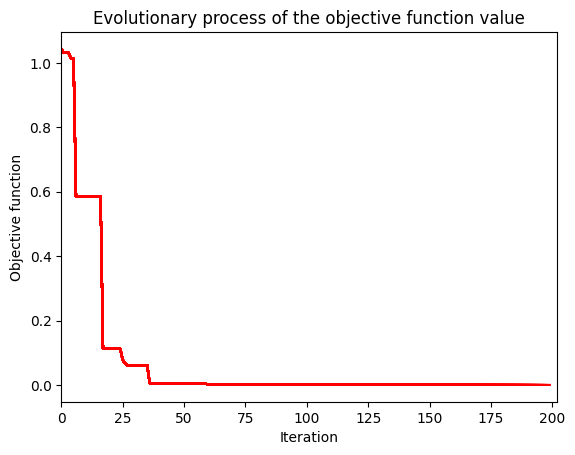

In [8]:
if mm == -1:
    initial_fitness = float("inf")
if mm == 1:
    initial_fitness = -float("inf")

# Main PSO
PSO(objective_function, bounds, particle_size, iterations)
plt.show()

# PSO Sumber Sad

### Objective Function

The objective function designed to be minimized is:

$$
f(x, y) = (x - 5)^2 + (y + 2)^2 + 10 \cdot \sin(x) \cdot \cos(y)
$$

### Constraints

The constraints for this optimization problem are:

1. **Circular Boundary Constraint**:
   $$
   x^2 + y^2 \leq 25
   $$
   This constraint ensures that the solution lies within a circle of radius 5 centered at the origin (0,0) on the \(xy\)-plane.

2. **Linear Inequality Constraint**:
   $$
   x - y \geq 0
   $$
   This implies that \(x\) must be greater than or equal to \(y\).

3. **Lower Bound Constraints**:
   $$
   x \geq 1 \quad \text{and} \quad y \geq -5
   $$
   These constraints set minimum values for \(x\) and \(y\) respectively, where \(x\) must be at least 1, and \(y\) must be no less than -5.


In [9]:
import numpy as np

class Agent:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.best_position = np.copy(position)
        self.best_fitness = float('inf')

    def update_personal_best(self, fitness):
        if fitness < self.best_fitness:
            self.best_fitness = fitness
            self.best_position = np.copy(self.position)

class PSO:
    def __init__(self, pop_size, dimensions, bounds, epochs):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.bounds = bounds
        self.epochs = epochs
        self.w = 0.6  # inertia weight
        self.c1 = 1.2  # cognitive coefficient
        self.c2 = 1.2  # social coefficient
        self.global_best_position = np.zeros(dimensions)
        self.global_best_fitness = float('inf')
        self.population = [self.create_agent() for _ in range(pop_size)]

    def create_agent(self):
        position = np.random.uniform(self.bounds[0], self.bounds[1], self.dimensions)
        velocity = np.random.uniform(-1, 1, self.dimensions)
        return Agent(position, velocity)

    def evaluate(self, agent):
        x, y = agent.position
        fitness = (x - 5)**2 + (y + 2)**2 + 10 * np.sin(x) * np.cos(y)

        # Constraint penalties
        if x**2 + y**2 > 25:
            fitness += 1000 * (x**2 + y**2 - 25)
        if x - y < 0:
            fitness += 1000 * (-(x - y))
        if x < 1:
            fitness += 1000 * (1 - x)
        if y < -5:
            fitness += 1000 * (-5 - y)

        return fitness

    def update_velocity_and_position(self, agent):
        r1, r2 = np.random.rand(), np.random.rand()
        cognitive_velocity = self.c1 * r1 * (agent.best_position - agent.position)
        social_velocity = self.c2 * r2 * (self.global_best_position - agent.position)
        agent.velocity = self.w * agent.velocity + cognitive_velocity + social_velocity
        agent.position += agent.velocity
        agent.position = np.clip(agent.position, self.bounds[0], self.bounds[1])  # Enforce boundaries

    def run(self):
        for epoch in range(self.epochs):
            for agent in self.population:
                fitness = self.evaluate(agent)
                agent.update_personal_best(fitness)
                if fitness < self.global_best_fitness:
                    self.global_best_fitness = fitness
                    self.global_best_position = np.copy(agent.position)

            for agent in self.population:
                self.update_velocity_and_position(agent)

            print(f'Epoch {epoch+1}: Global Best Fitness = {self.global_best_fitness}')

        return self.global_best_position, self.global_best_fitness

# Parameters
pop_size = 50
dimensions = 2
bounds = np.array([[1, -5], [10, 5]])  # [lower_bounds, upper_bounds] adjusted for x >= 1, y >= -5
epochs = 10

# Running PSO
pso = PSO(pop_size, dimensions, bounds, epochs)
best_position, best_fitness = pso.run()
print(f"Final Best Position: {best_position}, Final Best Fitness: {best_fitness}")


Epoch 1: Global Best Fitness = -1.3254844293200856
Epoch 2: Global Best Fitness = -6.374950614403037
Epoch 3: Global Best Fitness = -6.488504504945748
Epoch 4: Global Best Fitness = -6.58287089007861
Epoch 5: Global Best Fitness = -6.58287089007861
Epoch 6: Global Best Fitness = -6.58287089007861
Epoch 7: Global Best Fitness = -6.593760984903581
Epoch 8: Global Best Fitness = -6.593760984903581
Epoch 9: Global Best Fitness = -6.593760984903581
Epoch 10: Global Best Fitness = -6.595420428761509
Final Best Position: [ 4.76495219 -0.37721765], Final Best Fitness: -6.595420428761509


Note kode
* `agent.position = np.clip(agent.position, self.bounds[0], self.bounds[1])`  # Enforce boundaries : digunakan untuk memaksa `position` berada pada interval batas. Jika kurang akan diganti dengan batas bawah, jika lebih diganti batas atas

In [10]:
a = np.clip (1,2,3)
a

2

###Schedulling problem

In [11]:
import numpy as np

class Job:
    def __init__(self, duration):
        self.duration = duration

class Agent:
    def __init__(self, sequence):
        self.sequence = sequence
        self.best_sequence = sequence.copy()
        self.best_fitness = float('inf')

    def evaluate_fitness(self, jobs):
        time = 0
        total_completion_time = 0
        for idx in self.sequence:
            job = jobs[idx]
            time += job.duration
            total_completion_time += time
        return total_completion_time

    def update_personal_best(self, jobs):
        fitness = self.evaluate_fitness(jobs)
        if fitness < self.best_fitness:
            self.best_fitness = fitness
            self.best_sequence = self.sequence.copy()

class PSO:
    def __init__(self, jobs, pop_size, epochs):
        self.jobs = jobs
        self.pop_size = pop_size
        self.epochs = epochs
        self.population = [self.create_agent() for _ in range(pop_size)]
        self.global_best_sequence = None
        self.global_best_fitness = float('inf')

    def create_agent(self):
        sequence = np.random.permutation(len(self.jobs)).tolist()
        return Agent(sequence)

    def update_velocity_and_position(self):
        # Using a simple swap-based velocity metaphor
        for agent in self.population:
            new_sequence = agent.sequence.copy()
            i, j = np.random.randint(len(self.jobs), size=2)
            new_sequence[i], new_sequence[j] = new_sequence[j], new_sequence[i]
            agent.sequence = new_sequence

    def run(self):
        for epoch in range(self.epochs):
            for agent in self.population:
                agent.update_personal_best(self.jobs)
                if agent.best_fitness < self.global_best_fitness:
                    self.global_best_fitness = agent.best_fitness
                    self.global_best_sequence = agent.best_sequence.copy()

            self.update_velocity_and_position()

            print(f'Epoch {epoch+1}: Global Best Fitness = {self.global_best_fitness}')

        return self.global_best_sequence, self.global_best_fitness

# Example setup
jobs = [Job(5), Job(3), Job(8), Job(2)]
pop_size = 10
epochs = 20

# Running PSO
pso = PSO(jobs, pop_size, epochs)
best_sequence, best_fitness = pso.run()
print(f"Optimal Job Sequence: {best_sequence}, Minimum Completion Time: {best_fitness}")


Epoch 1: Global Best Fitness = 35
Epoch 2: Global Best Fitness = 35
Epoch 3: Global Best Fitness = 35
Epoch 4: Global Best Fitness = 35
Epoch 5: Global Best Fitness = 35
Epoch 6: Global Best Fitness = 35
Epoch 7: Global Best Fitness = 35
Epoch 8: Global Best Fitness = 35
Epoch 9: Global Best Fitness = 35
Epoch 10: Global Best Fitness = 35
Epoch 11: Global Best Fitness = 35
Epoch 12: Global Best Fitness = 35
Epoch 13: Global Best Fitness = 35
Epoch 14: Global Best Fitness = 35
Epoch 15: Global Best Fitness = 35
Epoch 16: Global Best Fitness = 35
Epoch 17: Global Best Fitness = 35
Epoch 18: Global Best Fitness = 35
Epoch 19: Global Best Fitness = 35
Epoch 20: Global Best Fitness = 35
Optimal Job Sequence: [3, 1, 0, 2], Minimum Completion Time: 35


In [12]:
jobs = [Job(5), Job(3), Job(8), Job(2)]
jobs

# Uji Coba Program Linear Sederhana

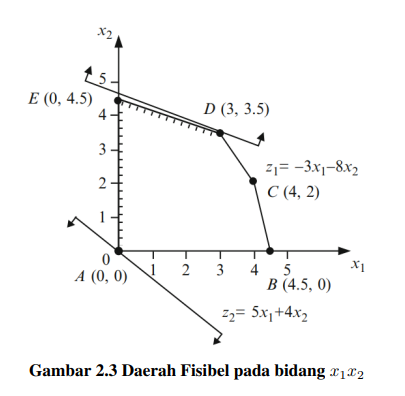

## Uji 1

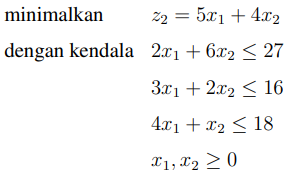

Penyelesaian optimal : (0, 0), nilai optimal : 0

In [13]:
import numpy as np

class Agent:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.best_position = np.copy(position)
        self.best_fitness = float('inf')

    def update_personal_best(self, fitness):
        if fitness < self.best_fitness:
            self.best_fitness = fitness
            self.best_position = np.copy(self.position)

class PSO:
    def __init__(self, pop_size, dimensions, bounds, epochs):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.bounds = bounds
        self.epochs = epochs
        self.w = 0.6  # inertia weight
        self.c1 = 1.2  # cognitive coefficient
        self.c2 = 1.2  # social coefficient
        self.global_best_position = np.zeros(dimensions)
        self.global_best_fitness = float('inf')
        self.population = [self.create_agent() for _ in range(pop_size)]

    def create_agent(self):
        position = np.random.uniform(self.bounds[0], self.bounds[1], self.dimensions)
        velocity = np.random.uniform(-1, 1, self.dimensions)
        return Agent(position, velocity)

    def evaluate(self, agent):
        x, y = agent.position
        fitness = 5*x + 4*y

        # Constraint penalties
        if 2*x + 6*y > 27:
            fitness += 1000 * ((2*x + 6*y) - 27)
        if 3*x + 2*y > 16:
            fitness += 1000 * ((3*x + 2*y) - 16)
        if 4*x + y > 18:
            fitness += 1000 * ((4*x + y) - 18)
        if x < 0:
            fitness += 1000 * (-x)
        if y < 0:
            fitness += 1000 * (-y)

        return fitness

    def update_velocity_and_position(self, agent):
        r1, r2 = np.random.rand(), np.random.rand()
        cognitive_velocity = self.c1 * r1 * (agent.best_position - agent.position)
        social_velocity = self.c2 * r2 * (self.global_best_position - agent.position)
        agent.velocity = self.w * agent.velocity + cognitive_velocity + social_velocity
        agent.position += agent.velocity
        agent.position = np.clip(agent.position, self.bounds[0], self.bounds[1])  # Enforce boundaries

    def run(self):
        for epoch in range(self.epochs):
            for agent in self.population:
                fitness = self.evaluate(agent)
                agent.update_personal_best(fitness)
                if fitness < self.global_best_fitness:
                    self.global_best_fitness = fitness
                    self.global_best_position = np.copy(agent.position)

            for agent in self.population:
                self.update_velocity_and_position(agent)

            print(f'Epoch {epoch+1}: Global Best Fitness = {self.global_best_fitness}')

        return self.global_best_position, self.global_best_fitness

# Parameters
pop_size = 50
dimensions = 2
bounds = np.array([[0,0], [4.5, 4.5]])  # [lower_bounds, upper_bounds] adjusted for x >= 1, y >= -5
epochs = 10

# Running PSO
pso = PSO(pop_size, dimensions, bounds, epochs)
best_position, best_fitness = pso.run()
print(f"Final Best Position: {best_position}, Final Best Fitness: {best_fitness}")


Epoch 1: Global Best Fitness = 1.3693073023141906
Epoch 2: Global Best Fitness = 0.0
Epoch 3: Global Best Fitness = 0.0
Epoch 4: Global Best Fitness = 0.0
Epoch 5: Global Best Fitness = 0.0
Epoch 6: Global Best Fitness = 0.0
Epoch 7: Global Best Fitness = 0.0
Epoch 8: Global Best Fitness = 0.0
Epoch 9: Global Best Fitness = 0.0
Epoch 10: Global Best Fitness = 0.0
Final Best Position: [0. 0.], Final Best Fitness: 0.0


## Uji 2

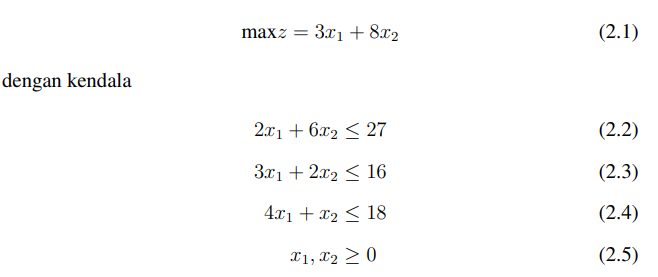

Penyelesaian optimal : (3, 3.5), nilai optimal : 37

In [14]:
import numpy as np

class Agent:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.best_position = np.copy(position)
        self.best_fitness = float('inf')

    def update_personal_best(self, fitness):
        if fitness < self.best_fitness:
            self.best_fitness = fitness
            self.best_position = np.copy(self.position)

class PSO:
    def __init__(self, pop_size, dimensions, bounds, epochs):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.bounds = bounds
        self.epochs = epochs
        self.w = 0.6  # inertia weight
        self.c1 = 1.2  # cognitive coefficient
        self.c2 = 1.2  # social coefficient
        self.global_best_position = np.zeros(dimensions)
        self.global_best_fitness = float('inf')
        self.population = [self.create_agent() for _ in range(pop_size)]

    def create_agent(self):
        position = np.random.uniform(self.bounds[0], self.bounds[1], self.dimensions)
        velocity = np.random.uniform(-1, 1, self.dimensions)
        return Agent(position, velocity)

    def evaluate(self, agent):
        x, y = agent.position
        fitness = -3*x - 8*y

        # Constraint penalties
        if 2*x + 6*y > 27:
            fitness += 1000 * ((2*x + 6*y) - 27)
        if 3*x + 2*y > 16:
            fitness += 1000 * ((3*x + 2*y) - 16)
        if 4*x + y > 18:
            fitness += 1000 * ((4*x + y) - 18)
        if x < 0:
            fitness += 1000 * (-x)
        if y < 0:
            fitness += 1000 * (-y)

        return fitness

    def update_velocity_and_position(self, agent):
        r1, r2 = np.random.rand(), np.random.rand()
        cognitive_velocity = self.c1 * r1 * (agent.best_position - agent.position)
        social_velocity = self.c2 * r2 * (self.global_best_position - agent.position)
        agent.velocity = self.w * agent.velocity + cognitive_velocity + social_velocity
        agent.position += agent.velocity
        agent.position = np.clip(agent.position, self.bounds[0], self.bounds[1])  # Enforce boundaries

    def run(self):
        for epoch in range(self.epochs):
            for agent in self.population:
                fitness = self.evaluate(agent)
                agent.update_personal_best(fitness)
                if fitness < self.global_best_fitness:
                    self.global_best_fitness = fitness
                    self.global_best_position = np.copy(agent.position)

            for agent in self.population:
                self.update_velocity_and_position(agent)

            print(f'Epoch {epoch+1}: Global Best Fitness = {self.global_best_fitness}')

        return self.global_best_position, self.global_best_fitness

# Parameters
pop_size = 50
dimensions = 2
bounds = np.array([[0,0], [4.5, 4.5]])  # [lower_bounds, upper_bounds] adjusted for x >= 1, y >= -5
epochs = 100

# Running PSO
pso = PSO(pop_size, dimensions, bounds, epochs)
best_position, best_fitness = pso.run()
print(f"Final Best Position: {best_position}, Final Best Fitness: {-best_fitness}")


Epoch 1: Global Best Fitness = -34.46832023311936
Epoch 2: Global Best Fitness = -36.58127937029858
Epoch 3: Global Best Fitness = -36.633253667048834
Epoch 4: Global Best Fitness = -36.70832027220816
Epoch 5: Global Best Fitness = -36.78314145066936
Epoch 6: Global Best Fitness = -36.98823996234277
Epoch 7: Global Best Fitness = -36.98823996234277
Epoch 8: Global Best Fitness = -36.98823996234277
Epoch 9: Global Best Fitness = -36.98823996234277
Epoch 10: Global Best Fitness = -36.98823996234277
Epoch 11: Global Best Fitness = -36.98823996234277
Epoch 12: Global Best Fitness = -36.98823996234277
Epoch 13: Global Best Fitness = -36.98823996234277
Epoch 14: Global Best Fitness = -36.98823996234277
Epoch 15: Global Best Fitness = -36.98823996234277
Epoch 16: Global Best Fitness = -36.98823996234277
Epoch 17: Global Best Fitness = -36.98823996234277
Epoch 18: Global Best Fitness = -36.98823996234277
Epoch 19: Global Best Fitness = -36.98823996234277
Epoch 20: Global Best Fitness = -36.988

Kesimpulan : Berhasil untuk program linear biasa. Untuk hasil konvergen yang maksimal jumlah partikel dan epoch ditambah

# Uji Coba Masalah Transportation Problem

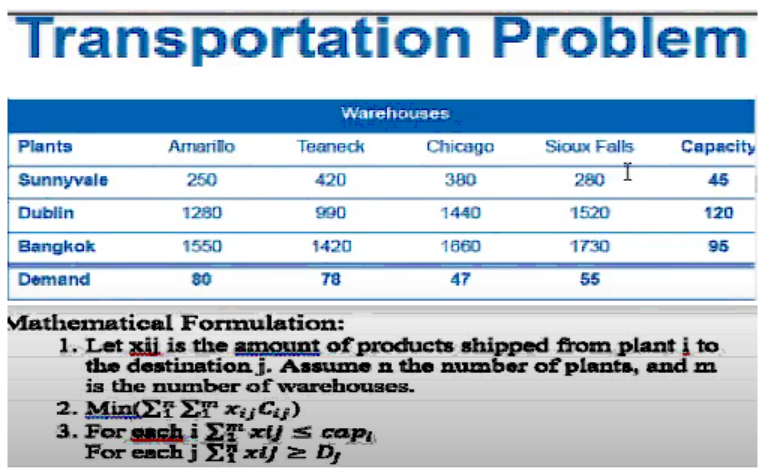

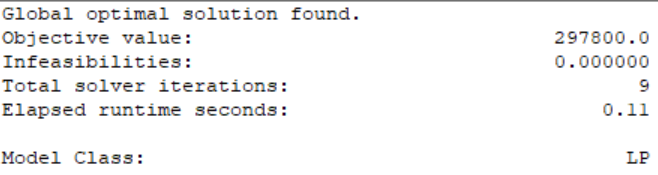

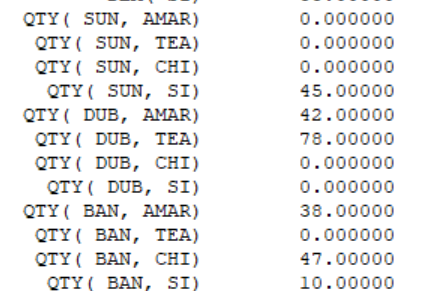

In [15]:
# Cost ij
Cij = np.array([[250, 420, 380, 280],
                [1280, 990, 1440, 1520],
                [1550, 1420, 1660, 1730]])

# Suplly/capacity i
capi = np.array([45, 120, 95])

# Demand j
Dj = np.array([80, 78, 47, 55])

In [16]:
import numpy as np

class Particle:
    def __init__(self, solution):
        self.solution = solution
        self.velocity = np.random.uniform(-1, 1, size=solution.shape)
        self.best_solution = solution.copy()
        self.best_cost = float('inf')

class PSO_Transportation:
    def __init__(self, supply, demand, costs, num_particles, epochs):
        self.supply = supply
        self.demand = demand
        self.costs = costs
        self.num_sources, self.num_destinations = costs.shape
        self.num_particles = num_particles
        self.epochs = epochs
        self.swarm = [self.create_particle() for _ in range(num_particles)]
        self.global_best_solution = None
        self.global_best_cost = float('inf')

    def create_particle(self):
        particle = Particle(np.random.randint(0, np.min([self.supply.sum(), self.demand.sum()]) + 1, size=(self.num_sources, self.num_destinations)))
        return particle

    def evaluate_cost(self, solution):
        return np.sum(solution * self.costs)

    def update_swarm(self):
        inertia_weight = 0.7
        cognitive_weight = 1.5
        social_weight = 1.5

        for particle in self.swarm:
            cognitive_velocity = cognitive_weight * np.random.rand() * (particle.best_solution - particle.solution)
            social_velocity = social_weight * np.random.rand() * (self.global_best_solution - particle.solution)
            new_velocity = inertia_weight * particle.velocity + cognitive_velocity + social_velocity
            new_solution = particle.solution + new_velocity

            # Clamp the solution to satisfy supply and demand constraints
            new_solution = np.maximum(0, np.minimum(new_solution, np.minimum(self.supply[:, None], self.demand)))

            particle.velocity = new_velocity
            particle.solution = new_solution

    def run(self):
        for epoch in range(self.epochs):
            for particle in self.swarm:
                cost = self.evaluate_cost(particle.solution)
                if cost < particle.best_cost:
                    particle.best_cost = cost
                    particle.best_solution = particle.solution.copy()

                if cost < self.global_best_cost:
                    self.global_best_cost = cost
                    self.global_best_solution = particle.solution.copy()

            self.update_swarm()

            print(f'Epoch {epoch+1}: Global Best Cost = {self.global_best_cost}')

        return self.global_best_solution, self.global_best_cost

# Example setup
supply = np.array([10, 20, 30])
demand = np.array([80, 78, 47, 55])
costs = np.array([[250, 420, 380, 280],
                [1280, 990, 1440, 1520],
                [1550, 1420, 1660, 1730]])

num_particles = 20
epochs = 50

# Running PSO for Transportation Problem
pso_transportation = PSO_Transportation(supply, demand, costs, num_particles, epochs)
best_solution, best_cost = pso_transportation.run()
print(f"Optimal Solution:\n{best_solution}\nMinimum Cost: {best_cost}")


Epoch 1: Global Best Cost = 226950
Epoch 2: Global Best Cost = 117444.51474329349
Epoch 3: Global Best Cost = 46217.40197396643
Epoch 4: Global Best Cost = 20814.904241976525
Epoch 5: Global Best Cost = 5300.0
Epoch 6: Global Best Cost = 5300.0
Epoch 7: Global Best Cost = 5300.0
Epoch 8: Global Best Cost = 5283.328320067501
Epoch 9: Global Best Cost = 5282.230116389125
Epoch 10: Global Best Cost = 5269.791197861514
Epoch 11: Global Best Cost = 5254.6204052395915
Epoch 12: Global Best Cost = 5231.517164782357
Epoch 13: Global Best Cost = 5195.134112879125
Epoch 14: Global Best Cost = 5123.869444585301
Epoch 15: Global Best Cost = 5007.908176076291
Epoch 16: Global Best Cost = 4898.156975504575
Epoch 17: Global Best Cost = 4697.824393049591
Epoch 18: Global Best Cost = 4498.430664490393
Epoch 19: Global Best Cost = 4218.972672510857
Epoch 20: Global Best Cost = 3936.2096840019567
Epoch 21: Global Best Cost = 3636.246855210856
Epoch 22: Global Best Cost = 3259.8456580838483
Epoch 23: Glob

# Pengalokasian Lokasi Tempat Pengungsian

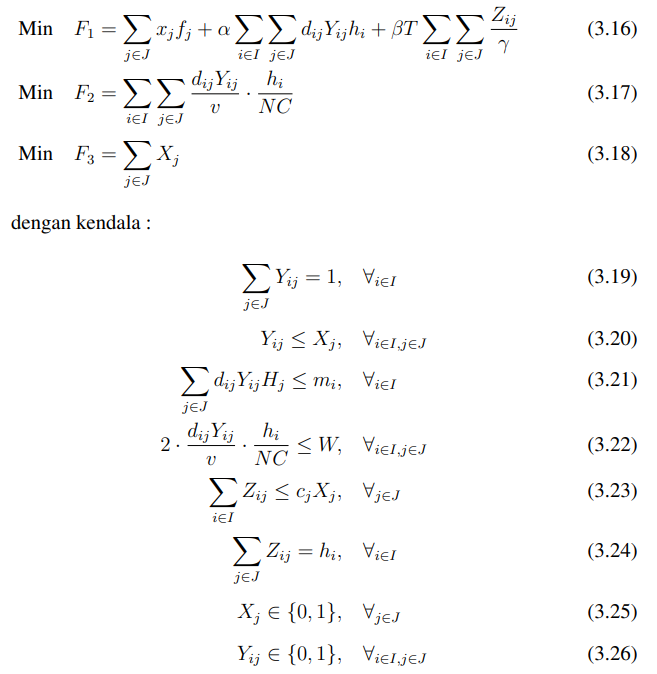

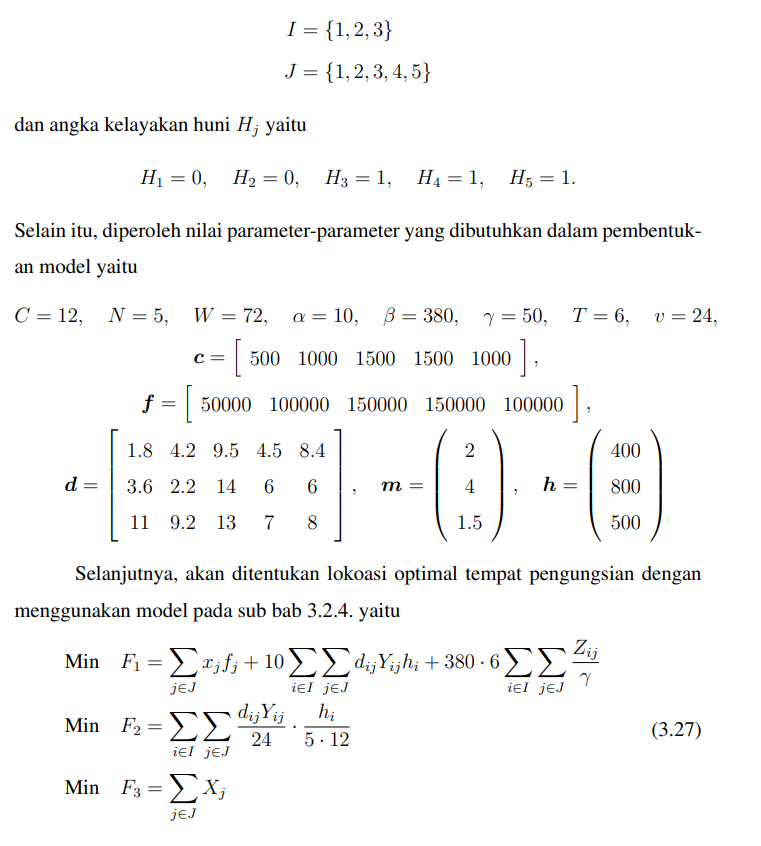

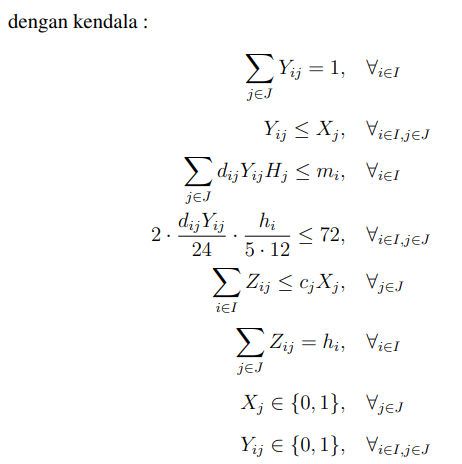

## Parameter dan Indeks

In [17]:
I = np.arange(3)
J = np.arange(5)
type(I[1])

numpy.int64

In [18]:
Hj = np.array([0, 0, 1, 1, 1])
cj = np.array([500, 1000, 1500, 1500, 1000])
fj = np.array ([5000, 10000, 15000, 15000, 10000])
dij = np.array([[1.8, 4.2, 9.5, 4.5, 8.4],
               [3.6, 2.2, 14, 6, 6],
               [11, 9.2, 13, 7, 8]])
mi = np.array([[2],
               [4],
               [1.5]])
hi = np.array([[400],
                [800],
                [500]])

## Variabel Keputusan

In [19]:
# Inisiasi Variabel Xj
def generateXj(numberOfNodes):
    result = [np.random.randint(0, 2) for _ in range(numberOfNodes)]
    return np.array(result)

print('Generating Variabel Xj')
Xj = generateXj(len(J))
Xj

Generating Variabel Xj


array([0, 1, 0, 0, 0])

In [20]:
def getLocationIndex(individual):
    indivLength = len(individual)
    buildIndexLocation = list()
    emptyIndexLocation = list()
    for i in range(indivLength):
        if (individual[i] == 1):
            buildIndexLocation.append(i)
        if (individual[i] == 0):
            emptyIndexLocation.append(i)
    return np.array(buildIndexLocation), np.array(emptyIndexLocation)

print('Find index which destin to build Charger')
locIndex, emptyLocIndex = getLocationIndex(Xj)
locIndex, emptyLocIndex

Find index which destin to build Charger


(array([1]), array([0, 2, 3, 4]))

In [21]:
# Insisiasi variabel Yij
def generatePlacementMatrixYij(buildDecision, nodes1 = len(I), nodes2 = len(J)):
    distanceMatrix = dij
    placementMatrix = np.zeros((nodes1, nodes2)).astype(int) # Matriks nol (node, node)
    distance = distanceMatrix.copy()
    nearestLocation = list()
    buildLocIndex, emptyLocIndex = getLocationIndex(buildDecision)

    # Handle the other index of placementMatrix
    for j in range(nodes1):
        for k in range(nodes2):
            if (k in emptyLocIndex):
                distance[j, k] = np.Inf

    # Get the nearest location
    for n in range(nodes1):
        nearestLocation.append(np.argmin(distance[n]))

    nearestLocation = np.array(nearestLocation)

    # Placement the main placement
    for o, p in zip(range(nodes1), nearestLocation):
        placementMatrix[o, p] = 1

    return placementMatrix

print('Creating Yij Matrix')
Yij = generatePlacementMatrixYij(Xj)
Yij

Creating Yij Matrix


array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [22]:
# Inisiasi variabel Zij
def generateZij(placementMatrix, listkorban = hi, nodes1 = len(I), nodes2 = len(J)):
    matrixTools = placementMatrix.copy()
    numofvictim = np.zeros((nodes1, nodes2)).astype(int)

    for i in range(nodes1):
      for j in range(nodes2):
        if matrixTools[i][j] == 1 :
          matrixTools[i][j] = hi[i][0]

    return matrixTools

In [23]:
print('Finding the number of victims, each Shelter')
Zij = generateZij(Yij)
Zij

Finding the number of victims, each Shelter


array([[  0, 400,   0,   0,   0],
       [  0, 800,   0,   0,   0],
       [  0, 500,   0,   0,   0]])

## Fungsi Tujuan

In [24]:
def calculateObjectiveFunction(Xj, Yij, Zij, I = I, J = J, distanceMatrix = dij, omega1 = 0.4, omega2 = 0.3, omega3 = 0.3,
                               cost = fj, alpha = 10, num_victim = hi, beta = 380, T = 6, gama = 50,
                               velocity = 24, num_vehicle = 5, cap_vehicle = 16):
    total1 = 0
    total2 = 0
    total3 = 0

    # Calculate the first part
    total1_a = 0
    total1_b = 0
    total1_c = 0
    for j in J:
      total1_a += Xj[j] * cost[j]

    for i in I:
      for j in J:
        total1_b += 2*alpha*distanceMatrix[i][j]*Yij[i][j]*num_victim[i]

    for i in I:
      for j in J:
        total1_c += beta*T*Zij[i][j]/gama

    total1 = total1_a + total1_b + total1_c
    print('Total1 => ', total1)

  # Calculate the second part
    for i in I:
      for j in J:
        total2 += distanceMatrix[i][j]*num_victim[i]/(velocity*num_vehicle*cap_vehicle)

    print('Total2 => ', total2)

  # Calculate the third part
    for j in J:
      total2 += distanceMatrix[i][j]*num_victim[i]/(velocity*num_vehicle*cap_vehicle)

    print('Total3 => ', total3)

    return omega1*total1 + omega2*total2 + omega3*total3

In [25]:
objFunct = calculateObjectiveFunction(Xj, Yij, Zij)
objFunct

Total1 =>  [248320.]
Total2 =>  [31.71875]
Total3 =>  0


array([99341.28125])

## Fungsi Kendala

In [39]:
def constraint1(Yij, I = I, J = J):
  total = 0
  for i in I:
    totalRow = 0
    for j in J:
      totalRow += Yij[i, j]
    if (totalRow == 1):
      total += 1
  if (total == len(I)):
    return True
  return False

def constraint2(Xj, Yij, I = I, J = J):
    total = 0
    for i in I:
        temp = 0
        for j in J:
            if (Xj[j] >= Yij[i, j]):
                temp += 1
        if (temp == len(J)):
            total += 1
    if (total == len(I)):
        return True
    return False

def constraint3(Yij, I = I, J = J, dij = dij, Hj = Hj, mi = mi):
  total = 0
  for i in I:
    totalRow = 0
    for j in J:
      totalRow += dij[i, j]*Yij[i, j]*Hj[j]
    if (totalRow <= mi[i]):
      total += 1
  if (total == len(I)):
    return True
  return False

def constraint4(Yij, I = I, J = J, dij = dij, hi = hi, v = 24, N = 5, C = 5, W = 72):
    total = 0
    for i in I:
        temp = 0
        for j in J:
            if (2*dij[i, j]*Yij[i, j]*hi[i]/(v*N*C) <= W):
                temp += 1
        if (temp == len(J)):
            total += 1
    if (total == len(I)):
        return True
    return False

def constraint5(Xj, Zij, I = I, J = J, cj = cj):
  total = 0
  for j in J:
    totalRow = 0
    for i in I:
      totalRow += Zij[i, j]
    if (totalRow <= cj[j]*Xj[j]):
      total += 1
  if (total == len(J)):
    return True
  return False

def constraint6(Zij, I = I, J = J, hi = hi):
  total = 0
  for i in I:
    totalRow = 0
    for j in J:
      totalRow += Zij[i, j]
    if (totalRow <= hi[i]):
      total += 1
  if (total == len(I)):
    return True
  return False

In [27]:
Xj

array([0, 1, 0, 0, 0])

In [28]:
Yij

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [38]:
Zij[1,2]

0

In [40]:
constraint6(Zij)

True

## Pembuatan Partikel